In [1]:
import numpy as np
from graphqec import BivariateBicycleCode, ThresholdLAB

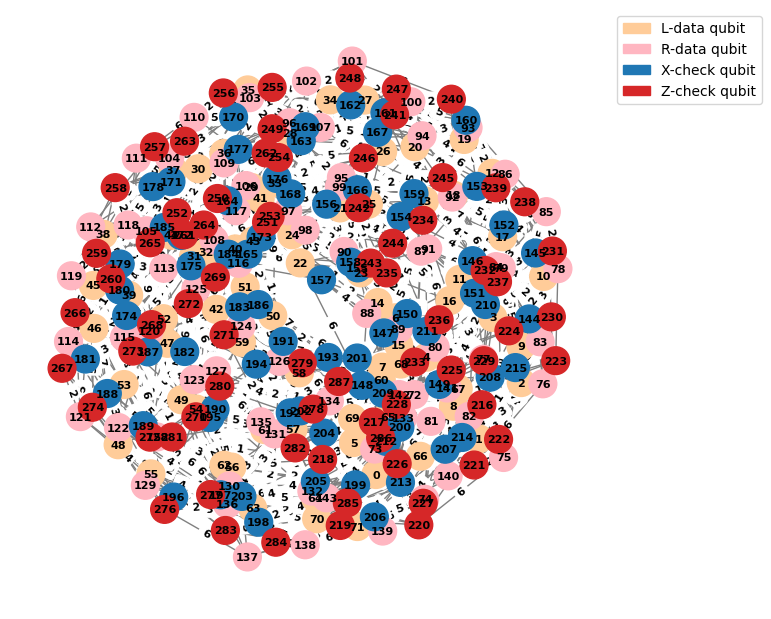

In [2]:
bb = BivariateBicycleCode(
    L1 = 12,
    L2 = 6,
    a1 = 3,
    a2 = 1,
    a3 = 2,
    b1 = 3,
    b2 = 1,
    b3 = 2
)
bb.draw_graph()

In [ ]:
th = ThresholdLAB(
    configurations = [{"L1":6, "L2": 6, "a1": 3, "a2": 1, "a3": 2, "b1": 3, "b2": 1, "b3": 2}],
    code = BivariateBicycleCode,
    error_rates = np.linspace(0.001, 0.02, 3),
    decoder='bposd'
)

th.collect_stats(
    num_workers = 8,
    max_shots = 10**3,
    max_errors= 100
)

th.plot_stats()

In [ ]:
from graphqec import CssCode
from stimbposd import sinter_decoders

bbc = BivariateBicycleCode(
    Lx = 6,
    Ly = 6,
    a1 = 3,
    a2 = 1,
    a3 = 2,
    b1 = 3,
    b2 = 1,
    b3 = 2,
)

A = bbc.A1+bbc.A2+bbc.A3
B = bbc.B1+bbc.B2+bbc.B3

Hx = np.array([list(row) for row in np.hstack((bbc.A,bbc.B))])
Hz = np.array([list(row) for row in np.hstack((bbc.B.T, bbc.A.T))])

cssbbc = CssCode(Hx,Hz)

th = ThresholdLAB(
    configurations =[{"Hx": Hx, "Hz": Hz, "name": "BBC"}],
    code = CssCode,
    error_rates = np.linspace(0.001, 0.002, 2),
    decoder='bposd'
)

th.collect_stats(
    num_workers = 4,
    max_shots = 1000,
    max_errors = 100,
    logic_check = "Z",
    decoder_params = sinter_decoders()
)

th.plot_stats()